In [40]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline

In [43]:
df = pd.read_excel('candles pop.xlsx')

In [44]:
df.head()

,Название свечи,Аромат свечи,Объем свечи,Цена свечи,Количество проданных свечей
0,Apple pie,Яблочный пирог,100,1050,134
1,Evening by the fireplace,"Мед, ладан",100,1050,107
2,Moon shot,"Мята, зеленый чай",100,1050,122
3,Lazy morning,Хлопок,100,1050,95
4,Just for boys,"Морская соль, апельсин",100,1050,64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Название свечи               16 non-null     object
 1   Аромат свечи                 16 non-null     object
 2   Объем свечи                  16 non-null     int64 
 3   Цена свечи                   16 non-null     int64 
 4   Количество проданных свечей  16 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 768.0+ bytes


In [46]:
sales_by_candle_name = df.groupby('Название свечи')['Количество проданных свечей'].sum() 
# Считаем количество проданных свечей, сгруппированных по названию.

In [47]:
sales_by_candle_scent = df.groupby('Аромат свечи')['Количество проданных свечей'].sum() 
# Считаем количество проданных свечей, сгруппированных по аромату.

In [48]:
sales_by_candle_volume = df.groupby('Объем свечи')['Количество проданных свечей'].sum() 
# Считаем количество проданных свечей, сгруппированных по объему.

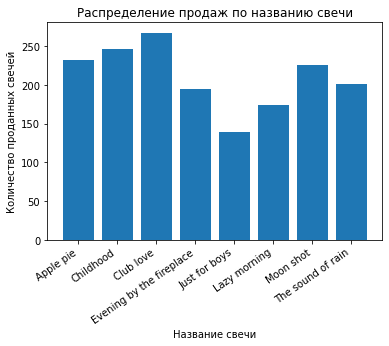

In [49]:
plt.bar(sales_by_candle_name.index, sales_by_candle_name.values)
plt.title('Распределение продаж по названию свечи')
plt.xlabel('Название свечи')
plt.ylabel('Количество проданных свечей')
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.show()

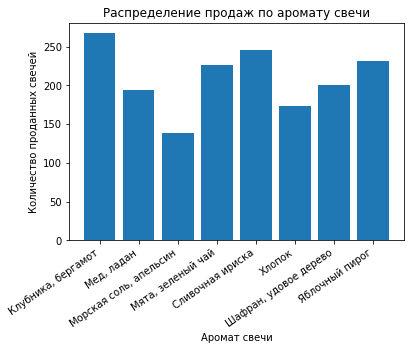

In [50]:
plt.bar(sales_by_candle_scent.index, sales_by_candle_scent.values)
plt.title('Распределение продаж по аромату свечи')
plt.xlabel('Аромат свечи')
plt.ylabel('Количество проданных свечей')
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.show()

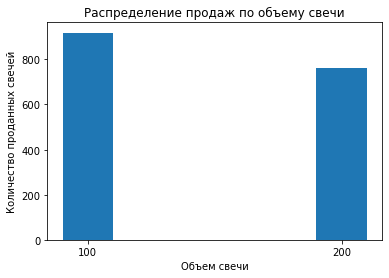

In [51]:
plt.bar(sales_by_candle_volume.index, sales_by_candle_volume.values, width=20)
plt.title('Распределение продаж по объему свечи')
plt.xlabel('Объем свечи')
plt.ylabel('Количество проданных свечей')
plt.xticks([100, 200], fontsize=10)
plt.show()

In [52]:
df_2 = pd.read_excel('Данные покупателей.xlsx')

In [53]:
sex_distribution = df_2['Пол'].value_counts(normalize=True)*100 # Получаем распределение покупателей по полу.
# Используем normalize=True для вычисления значения в процентах.

In [54]:
sex_distribution

ж    84.862932
м    15.137068
Name: Пол, dtype: float64

In [55]:
month_distribution = df_2['Месяц покупки'].value_counts(normalize=True)*100 # Считаем распределение покупок по месяцам.

In [56]:
month_distribution

Сентябрь    11.799762
Ноябрь      11.144219
Январь      10.250298
Декабрь     10.190703
Февраль      9.356377
Март         9.237187
Октябрь      9.058403
Апрель       7.806913
Июнь         6.615018
Май          5.959476
Август       5.244338
Июль         3.337306
Name: Месяц покупки, dtype: float64

In [57]:
name_distribution = df_2['Название свечи'].value_counts(normalize=True)*100 # Считаем распределение по названиям.

In [58]:
name_distribution

Club love                   16.030989
Childhood                   14.779499
Apple pie                   13.885578
Moon shot                   13.587604
Evening by the fireplace    11.680572
The sound of rain           11.203814
Lazy morning                10.488677
Just for boys                8.343266
Name: Название свечи, dtype: float64

In [59]:
volume_distribution = df_2['Объем свечи'].value_counts(normalize=True)*100 # Считаем распределение по объему.

In [60]:
volume_distribution

100    54.588796
200    45.411204
Name: Объем свечи, dtype: float64

In [61]:
name_volume_distribution = df_2.groupby(['Название свечи', 'Объем свечи']).size().reset_index(name='Количество покупок') 
# Считаем распределение по сочетанию названия свечи и объема.

In [62]:
name_volume_distribution['Процент покупок'] = name_volume_distribution['Количество покупок']/len(df_2)*100 
# Добавляем новый столбец.

In [63]:
name_volume_distribution = name_volume_distribution.sort_values(by='Процент покупок', ascending=False) 
# Сортируем по новому столбцу "Процент покупок" от большего к меньшему.

In [64]:
name_volume_distribution

,Название свечи,Объем свечи,Количество покупок,Процент покупок
4,Club love,100,156,9.296782
2,Childhood,100,138,8.224076
0,Apple pie,100,134,7.985697
12,Moon shot,100,123,7.330155
5,Club love,200,113,6.734207
3,Childhood,200,110,6.555423
6,Evening by the fireplace,100,108,6.436234
13,Moon shot,200,105,6.257449
1,Apple pie,200,99,5.899881
14,The sound of rain,100,97,5.780691


In [65]:
buyer_sex_characteristicks = df_2.groupby(['Название свечи', 'Объем свечи', 'Пол']).size()\
.reset_index(name='Количество покупок') 
# Вычисляем количество покупок свечей каждого аромата и объема покупателями в зависимости от пола.

In [66]:
buyer_sex_characteristicks['Доля покупок'] = buyer_sex_characteristicks['Количество покупок']\
/sum(buyer_sex_characteristicks['Количество покупок']) 
# Добавляем новый столбец в ДФ

In [67]:
buyer_sex_characteristicks['Доля покупок']*=100 # Преобразуем данные нового столбца в проценты

In [68]:
buyer_sex_characteristicks = buyer_sex_characteristicks.sort_values(by='Доля покупок', ascending=False) 
# Сортируем ДФ по убыванию показателя "Доля покупок"

In [69]:
buyer_sex_characteristicks.head()

,Название свечи,Объем свечи,Пол,Количество покупок,Доля покупок
8,Club love,100,ж,137,8.164482
4,Childhood,100,ж,122,7.270560
0,Apple pie,100,ж,110,6.555423
24,Moon shot,100,ж,107,6.376639
10,Club love,200,ж,98,5.840286


In [70]:
# Исходя из проведенного анализа можно сделать множество выводов, например: 
# на какую аудиторию ориенитроваться при планировании рекламной кампании;
# какие ароматы продаются лучше остальных, какие материалы для изготовления должны быть закуплены в большем количестве;
# в какое время года товар наиболее актуален;
#
# Файл продолжает дополняться, в будущем при сборе достаточных данных будет также проведен RFM анализ.